# Cálculo de intervalo de confiança com bootstrap

Esse caderno usa bootstrap pra calcular o intervalo de confiança de 95% de algumas métricas (mediana, quantil 99% e quantil 99.9%).

Para isso foi considerada uma simulação com 100.000 eventos. Devido ao número de eventos, esses dados foram considerados como os dados corretos. A partir daí, usamos os n primeiros eventos para extrair as métricas desejadas e calculamos o intervalo de confiança usando o bootstraping aplicado a esses n primeiros eventos. Com isso, plotamos o intervalo de confiança calculado para essas n amostras.

## Preparação do ambiente

Vamos começar criando uma função bootstrap que recebe uma amostra e faz a reamostragem com substituição dessa amostra e aplica alguma função de interesse nos dados. A partir daí, retorna a reamostragem, o valor esperado da métrica desejada, o intervalo de confiança de 95% e o erro padrão.

In [1]:
#############################################################################
# Cálculos do intervalo de confiança usando bootstrap
# O que pode ser alterado:
# - sample: contém as amostras da simulação
# - nResamples: é a quantidade de reamostranges no bootstrap
# - func: função aplicada a cada reamostragem para trazer o item de interesse
#############################################################################

import numpy as np
import matplotlib.pyplot as plt

# Aplica bootstrap em sample para encontrar o quantil 'quantil', seu intervalo
# de confiança e seu erro padrão
def bootstrap(sample, n_resamples, func):
    bootstraped_value = np.zeros(n_resamples)

    for i in range(0, n_resamples):
        # Faz a reamostragem
        resampled = np.random.choice(sample, size=sample.shape, replace=True)
        # Aplica a função desejada
        bootstraped_value[i] = func(resampled)
        
    # Retorna o array bootstrap, o valor esperado, o intervalo de confiança e o erro padrão
    return [bootstraped_value,
            np.mean(bootstraped_value), 
            np.percentile(bootstraped_value, [2.5,97.5]),
            np.std(bootstraped_value)]



## Análise

Vamos abrir um arquivo de simulação e plotar alguns dados dele:

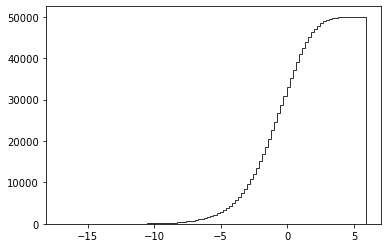

Vamos considerar que os dados dessa distribuição com 50000 registros são os dados reais
A mediana é -0.705425
O quantil 99% é 3.391903500000003
O quantil 99.9% é 4.4927326700000485


In [2]:
# Carrega os dados de uma simulação
# arquivo_resultado = 'INR.txt'
arquivo_resultado = 'resultados/50000 amostras/DL_25km2_nadir_50_4operadoras_analise_parametrica/sharc/output/[SYS] INR samples.txt'
all_data = np.loadtxt(arquivo_resultado, dtype='float', usecols=(1), delimiter="\t", comments="#")

plt.hist(all_data, cumulative=True, label='CDF', histtype='step', alpha=0.8, color='k', bins=100)
plt.show()

print('Vamos considerar que os dados dessa distribuição com', len(all_data), 'registros são os dados reais')
print('A mediana é', np.median(all_data))
print('O quantil 99% é', np.percentile(all_data, 99))
print('O quantil 99.9% é', np.percentile(all_data, 99.9))

Agora vamos calcular esses mesmos dados usando bootstrap para diversos tamanhos de amostra:

In [3]:
# Para ficar fácil de reproduzir os resultados:
np.random.seed(42)

# Pega essa simulação e estuda como varia o intervalo de confiança para a mediana
# considerando diversos tamanhos de amostra
qtd_inicial_amostras = 1000
total_amostras = len(all_data)
total_simulacoes = 200
passo = int((total_amostras - qtd_inicial_amostras)/total_simulacoes)
qtd_amostras_analisadas = range(qtd_inicial_amostras, total_amostras, passo)

print_a_cada_iter = 20

def roda_bootstrap(func):
    parametro_calculado = list()
    intervalo_confianca_inf = list()
    intervalo_confianca_sup = list()
    erro_padrao_calculado = list()
    
    idx_simulacao = 0
    
    for n_amostras in qtd_amostras_analisadas:
        idx_simulacao = idx_simulacao + 1
        if (idx_simulacao % print_a_cada_iter == 0):
            print('Iniciando cálculos para', n_amostras)
            
        sampled = all_data[0:n_amostras]
        _, parametro, intervalo_confianca, erro_padrao = bootstrap(sampled, 1000, func)
        parametro_calculado.append(parametro)
        intervalo_confianca_inf.append(intervalo_confianca[0])
        intervalo_confianca_sup.append(intervalo_confianca[1])
        erro_padrao_calculado.append(erro_padrao)
        
    return [parametro_calculado, intervalo_confianca_inf, intervalo_confianca_sup, erro_padrao_calculado]

def plot_parametro_com_intervalo_confianca(label, valor_real, parametro_calculado, intervalo_confianca_inf, intervalo_confianca_sup, ymin=None, ymax=None):
    plt.plot(qtd_amostras_analisadas, parametro_calculado)
    plt.plot(qtd_amostras_analisadas, intervalo_confianca_inf, 'b')
    plt.plot(qtd_amostras_analisadas, intervalo_confianca_sup, 'b')
    plt.plot(qtd_amostras_analisadas, valor_real*np.ones(len(qtd_amostras_analisadas)))
    plt.title(label)
    if ymin is not None and ymax is not None:
        xmin, xmax, _, _ = plt.axis()
        plt.axis([xmin, xmax, ymin, ymax])
    plt.show()

Iniciando cálculos para 5655
Iniciando cálculos para 10555
Iniciando cálculos para 15455
Iniciando cálculos para 20355
Iniciando cálculos para 25255
Iniciando cálculos para 30155
Iniciando cálculos para 35055
Iniciando cálculos para 39955
Iniciando cálculos para 44855
Iniciando cálculos para 49755


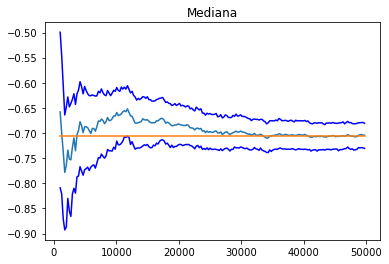

In [4]:
# MEDIANA
parametro_estimado, ic_inf, ic_sup, erro_padrao_calculado = roda_bootstrap(np.median)
plot_parametro_com_intervalo_confianca('Mediana', np.median(all_data), parametro_estimado, ic_inf, ic_sup)

Iniciando cálculos para 5655
Iniciando cálculos para 10555
Iniciando cálculos para 15455
Iniciando cálculos para 20355
Iniciando cálculos para 25255
Iniciando cálculos para 30155
Iniciando cálculos para 35055
Iniciando cálculos para 39955
Iniciando cálculos para 44855
Iniciando cálculos para 49755


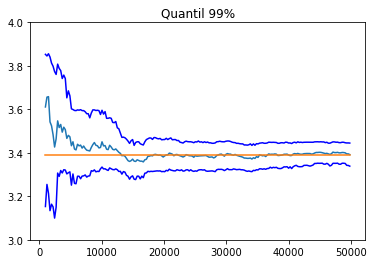

In [5]:
# QUANTIL 99%

def quantil_99(dados):
    return np.percentile(dados, 99)

parametro_estimado, ic_inf, ic_sup, erro_padrao_calculado = roda_bootstrap(quantil_99)
plot_parametro_com_intervalo_confianca('Quantil 99%', np.percentile(all_data, 99), parametro_estimado, ic_inf, ic_sup, 3, 4)

Iniciando cálculos para 5655
Iniciando cálculos para 10555
Iniciando cálculos para 15455
Iniciando cálculos para 20355
Iniciando cálculos para 25255
Iniciando cálculos para 30155
Iniciando cálculos para 35055
Iniciando cálculos para 39955
Iniciando cálculos para 44855
Iniciando cálculos para 49755


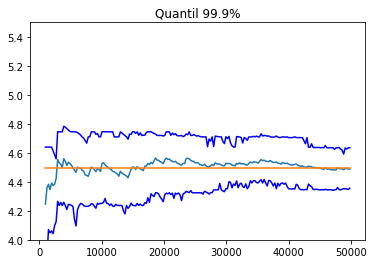

In [6]:
# QUANTIL 99.9%

def quantil_999(dados):
    return np.percentile(dados, 99.9)

parametro_estimado, ic_inf, ic_sup, erro_padrao_calculado = roda_bootstrap(quantil_999)
plot_parametro_com_intervalo_confianca('Quantil 99.9%', np.percentile(all_data, 99.9), parametro_estimado, ic_inf, ic_sup, 4, 5.5)